In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Data/202201-citibike-tripdata.csv', low_memory=False)

In [3]:
G = nx.from_pandas_edgelist(data, 'start_station_name', 'end_station_name', create_using=nx.MultiDiGraph())

In [4]:
num_days = 10

# print all the general info about the graph without info function
print("Directed Network Information:")
print(f"Number of Nodes: {len(G.nodes)}")
print(f"Number of Edges: {len(G.edges)}")
print(f"Number of Edges per day: {len(G.edges)/num_days}")
print(f"Graph Density per day: {nx.density(G)/num_days}")
print(f"Average In-Degree per day: {sum(dict(G.in_degree()).values()) / len(G) / num_days}")
print(f"Average Out-Degree per day: {sum(dict(G.out_degree()).values()) / len(G) / num_days}")

Directed Network Information:
Number of Nodes: 1536
Number of Edges: 1052418
Number of Edges per day: 105241.8
Graph Density per day: 0.04463634975570033
Average In-Degree per day: 68.516796875
Average Out-Degree per day: 68.516796875


In [5]:
# closeness centrality
print(f"Average Closeness Centrality: {sum(nx.closeness_centrality(G).values()) / len(G)}")

Average Closeness Centrality: 0.43446053895524805


In [6]:
G = nx.from_pandas_edgelist(data, 'start_station_name', 'end_station_name', create_using=nx.DiGraph())
print(f"Transitivity: {nx.transitivity(G)}")
print(f"Average Clustering Coefficient: {nx.average_clustering(G)}")

Transitivity: 0.4847661138653514
Average Clustering Coefficient: 0.4110435018307366


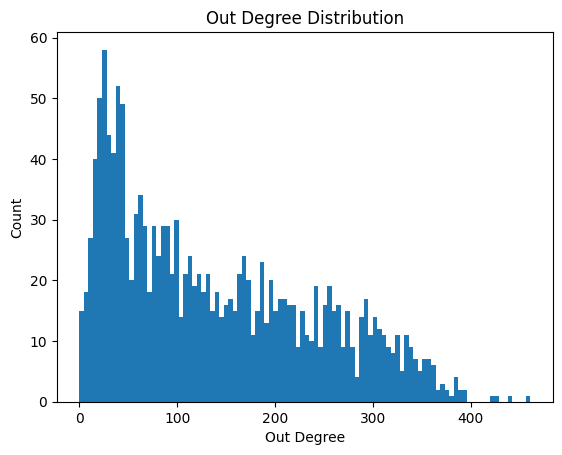

In [7]:
# plot out-degree distribution
out_degrees = [G.out_degree(n) for n in G.nodes() if G.out_degree(n) < 700]
plt.hist(out_degrees, bins=100)
plt.title("Out Degree Distribution")
plt.xlabel("Out Degree")
plt.ylabel("Count")
plt.show()

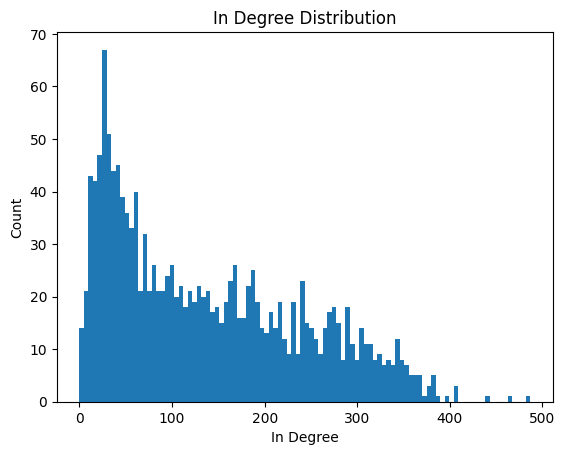

In [8]:
# plot in-degree distribution
in_degrees = [G.in_degree(n) for n in G.nodes() if G.in_degree(n) < 700]
plt.hist(in_degrees, bins=100)
plt.title("In Degree Distribution")
plt.xlabel("In Degree")
plt.ylabel("Count")
plt.show()

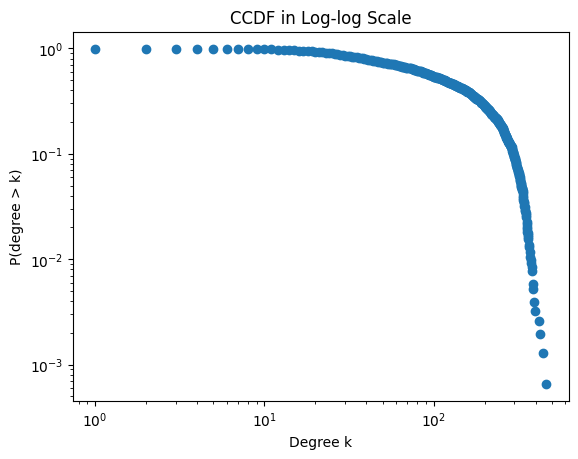

In [9]:
import numpy as np
from collections import Counter

sorted_out_degrees = sorted([G.out_degree(n) for n in G.nodes()])
sorted_counts = Counter(sorted_out_degrees)
prob = [sorted_counts[k]/G.number_of_nodes() for k in sorted_counts.keys()]
ccdf = [sum(prob[i:]) for i in range(len(prob))]
plt.loglog(sorted_counts.keys(), ccdf, marker='o', linestyle='None')
plt.xlabel('Degree k')
plt.ylabel('P(degree > k)')
plt.title('CCDF in Log-log Scale')
plt.show()

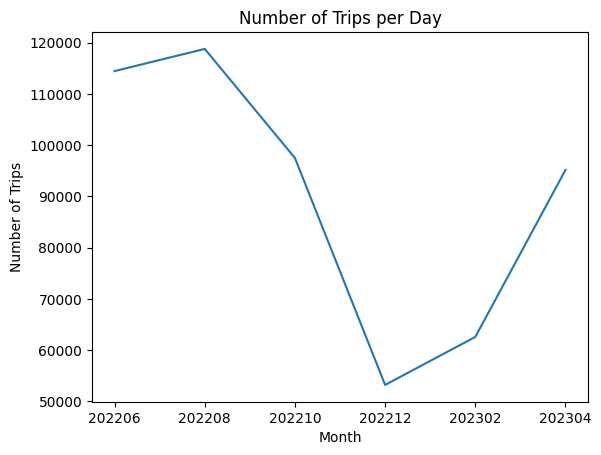

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


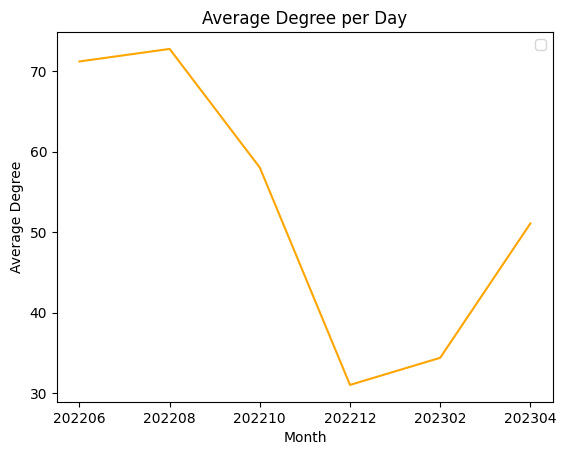

In [5]:
months = ['202206', '202208', '202210', '202212', '202302', '202304']
num_days = [30, 31, 31, 31, 28, 30]
num_edges_per_day = []
avg_in_degree_per_day = []

for month in months:
    data = pd.read_csv(f'Data/{month}-citibike-tripdata.csv', low_memory=False)
    G = nx.from_pandas_edgelist(data, 'start_station_name', 'end_station_name', create_using=nx.MultiDiGraph())
    num_edges_per_day.append(len(G.edges)/num_days[months.index(month)])
    avg_in_degree_per_day.append(sum(dict(G.in_degree()).values()) / len(G) / num_days[months.index(month)])

plt.plot(months, num_edges_per_day)
plt.title("Number of Trips per Day")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

plt.plot(months, avg_in_degree_per_day, color='orange')
plt.title("Average Degree per Day")
plt.xlabel("Month")
plt.ylabel("Average Degree")
plt.legend()
plt.show()